In [223]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams.update({'font.size': 15})

In [411]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import tree
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import GridSearchCV

In [225]:
data = pd.read_csv("Data2.csv")
print(data.shape)
data[:5]
df = data.copy()

(720, 4)


In [226]:
df

,Focus,Mag,H-Value,V-Value
0,-2.00,-0.30,0.95,1.497
1,-1.95,-0.30,0.78,1.468
2,-1.90,-0.30,1.02,1.428
3,-1.85,-0.30,0.95,1.419
4,-1.80,-0.30,0.94,1.514
...,...,...,...,...
715,1.75,0.55,0.89,1.140
716,1.80,0.55,0.84,0.984
717,1.85,0.55,0.86,0.998
718,1.90,0.55,0.87,1.051


In [227]:
def cross_validation(model, X, y, cv=5): 
    cv = KFold(5, shuffle=True)
    return cross_val_score(model, X, y, cv=cv).mean().round(4)

In [263]:
y = df['H-Value']

features = df.columns.difference(['Focus','Mag'])
X = df[features]
cont_features = X.columns.difference(['Mag'])
X.loc[:,cont_features] = StandardScaler().fit_transform(X[cont_features])
X_train, X_test, y_train, y_test = train_test_split(X, y)

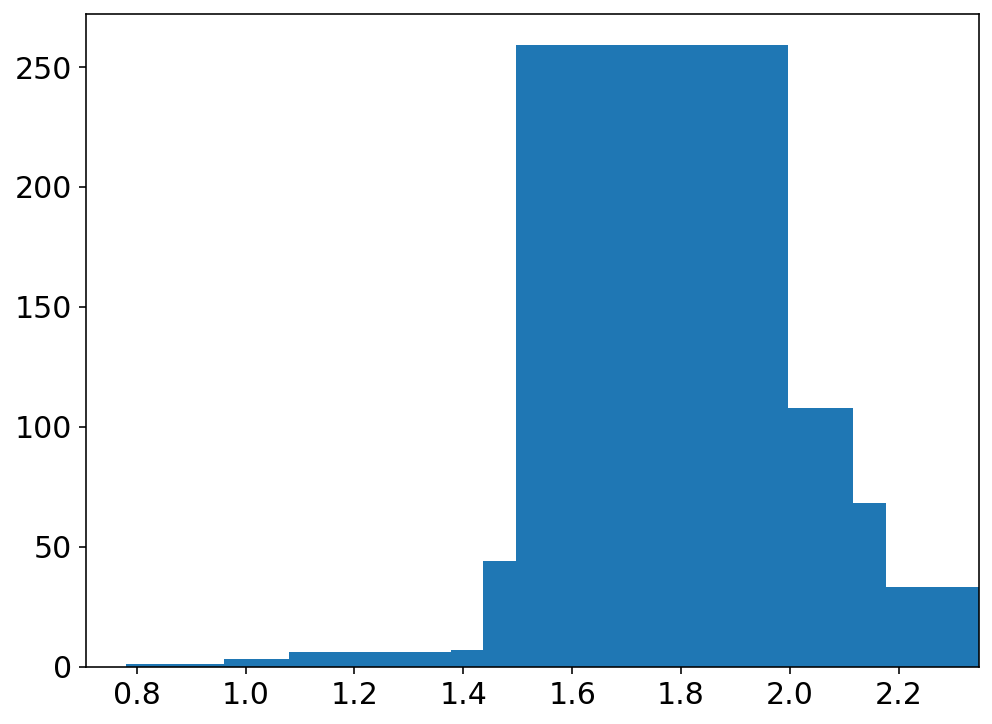

In [229]:
plt.hist(df['V-Value'], bins=25, width=0.5)
plt.show()

In [230]:
df.corr()[:5]

,Focus,Mag,H-Value,V-Value
Focus,1.000000e+00,1.184864e-17,0.138438,0.002772
Mag,1.184864e-17,1.000000e+00,-0.106872,0.030215
H-Value,1.384383e-01,-1.068724e-01,1.000000,0.734214
V-Value,2.772033e-03,3.021516e-02,0.734214,1.000000


<AxesSubplot:>

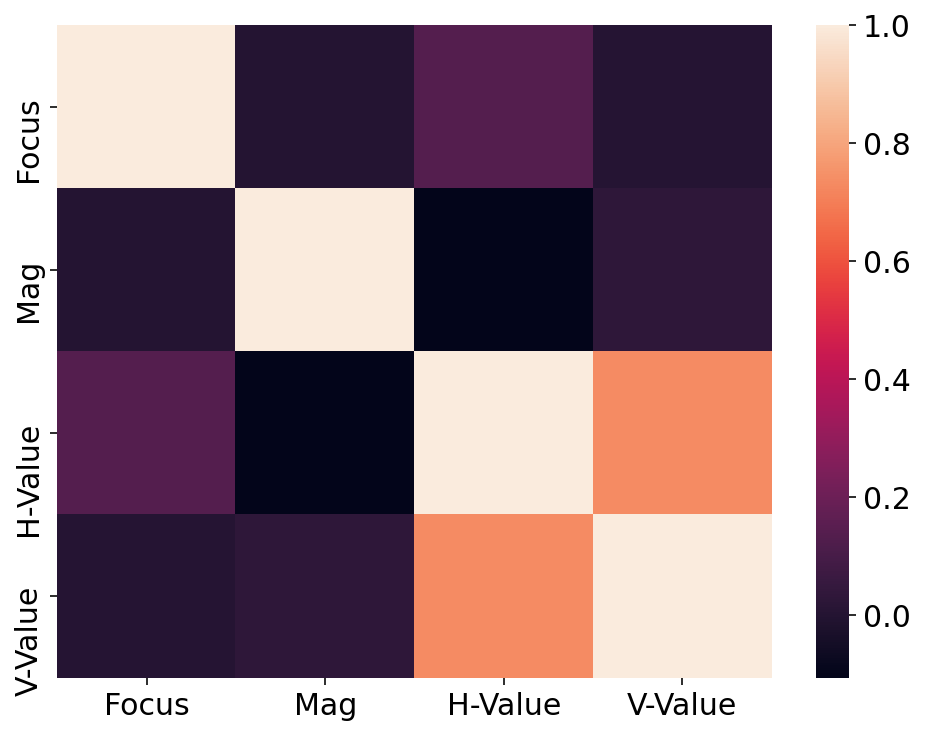

In [231]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

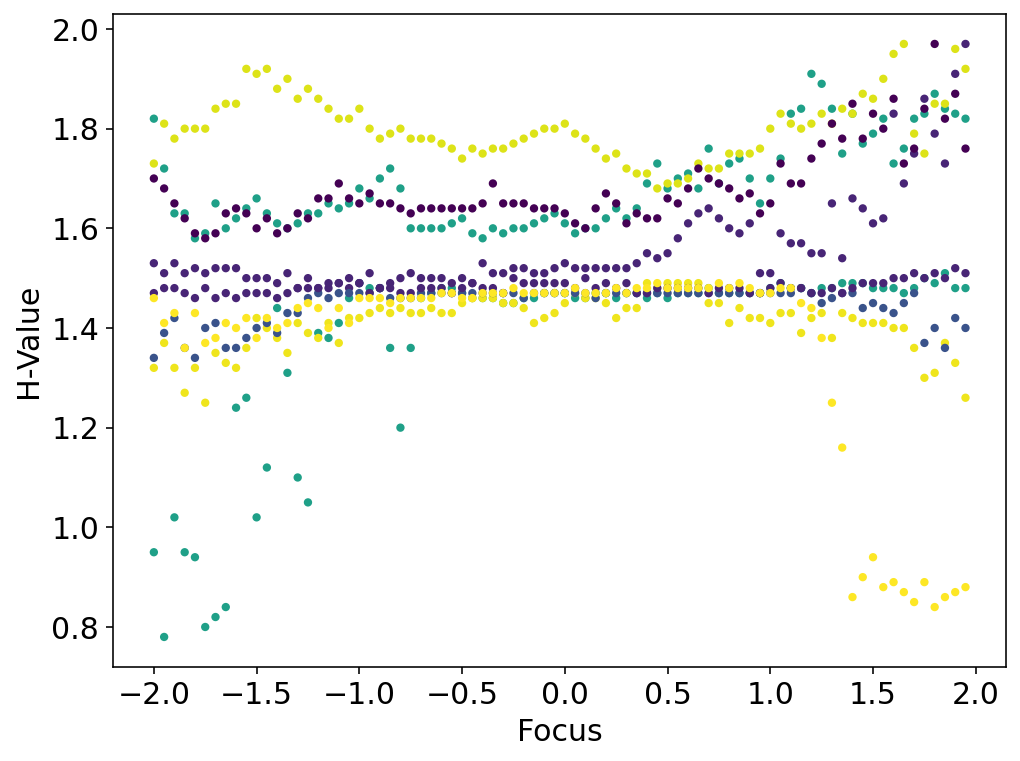

In [232]:
for col in ["Focus"]:
    plt.scatter(df[col] , df['H-Value'], c=df.Mag, s=10)
    plt.ylabel('H-Value')
    plt.xlabel(col)
    plt.show()

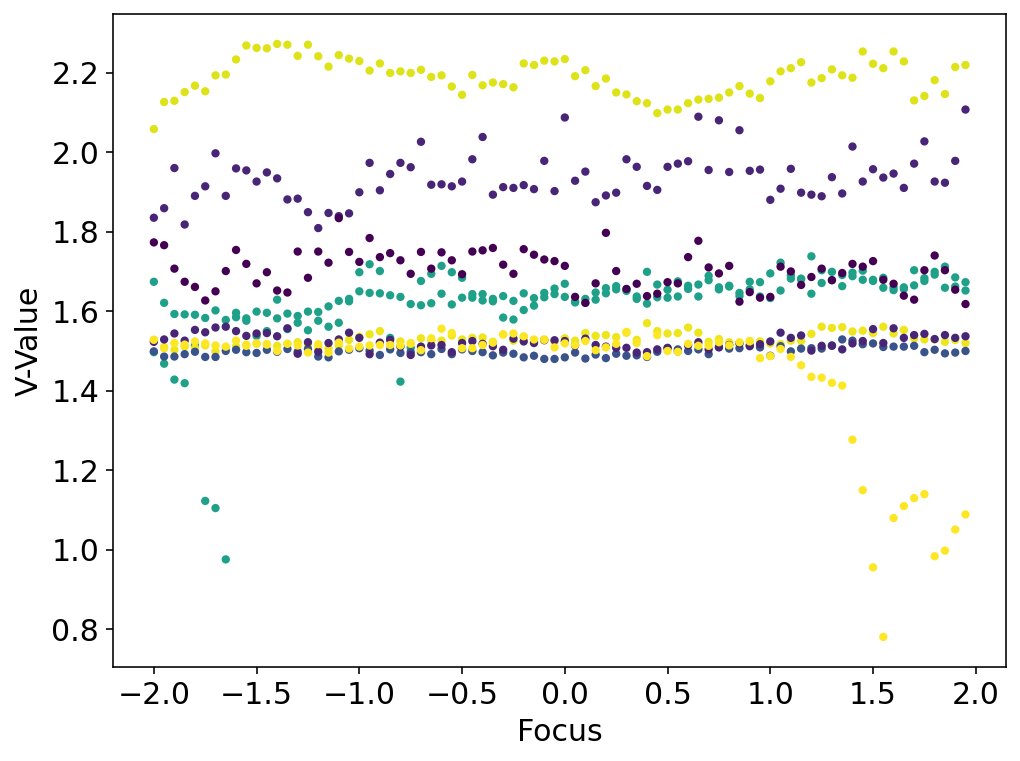

In [233]:
for col in ["Focus"]:
    plt.scatter(df[col] , df['V-Value'], c=df.Mag, s=10)
    plt.ylabel('V-Value')
    plt.xlabel(col)
    plt.show()

In [333]:
X = df[['Focus','Mag']]
y = df["H-Value"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.score(X_test, y_test)
a1, a2, b = linear_reg.coef_[0], linear_reg.coef_[1],linear_reg.intercept_
a1, a2, b

(0.028081342774047554, -0.01763248828677578, 1.531286930844113)

In [334]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round((y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      mean_absolute_error(y_test,y_pred).round(3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))
    print("Mean Absolute Percentile Error: ", 
      mean_absolute_percentage_error(y_test,y_pred).round(3))
    print("Percent Estimation: ", 
      (100*(1-mean_absolute_percentage_error(y_test,y_pred))).round(3),'%')

In [335]:
y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.429
Mean Absolute Error:  0.139
Root Mean Squared Error:  0.191
R-Squared:  0.003
Mean Absolute Percentile Error:  0.1
Percent Estimation:  89.98 %


In [336]:
features = data.columns.difference(['Focus', 'Mag'])
features

Index(['H-Value', 'V-Value'], dtype='object')

In [567]:
#선형 회귀 H Value
X = df[['Focus','Mag']]
y = df['H-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.432
Mean Absolute Error:  0.128
Root Mean Squared Error:  0.179
R-Squared:  0.036
Mean Absolute Percentile Error:  0.087
Percent Estimation:  91.337 %


<AxesSubplot:>

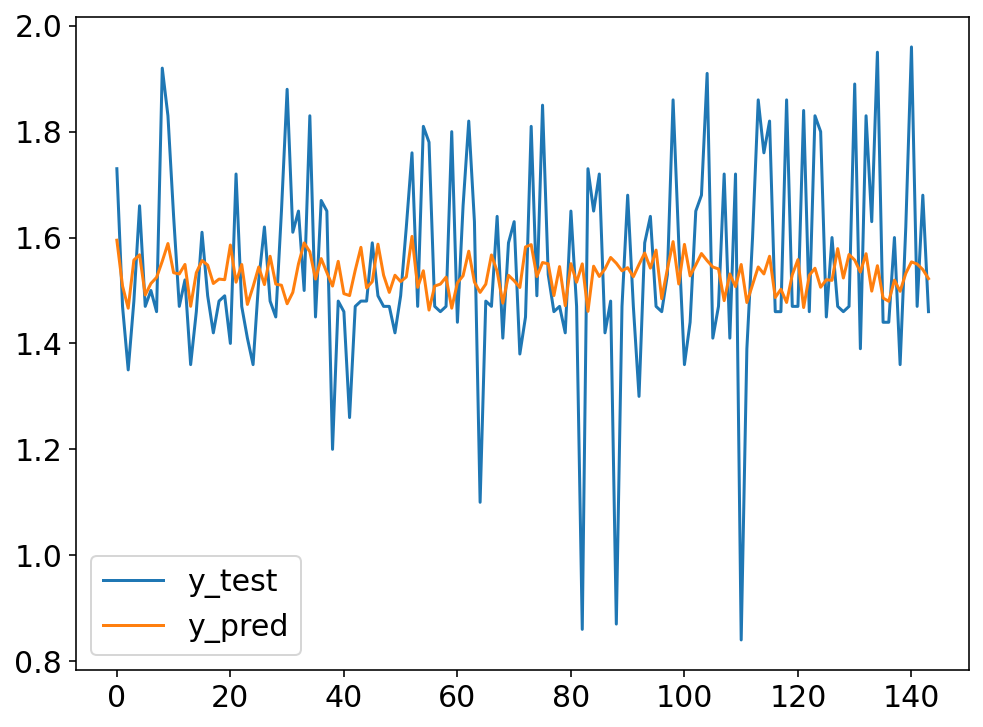

In [496]:
y_pred = linear_reg.predict(X_test)
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [576]:
#선형 회귀 V Value
X = df[['Focus','Mag']]
y = df['V-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.579
Mean Absolute Error:  0.179
Root Mean Squared Error:  0.23
R-Squared:  0.002
Mean Absolute Percentile Error:  0.104
Percent Estimation:  89.616 %


<AxesSubplot:>

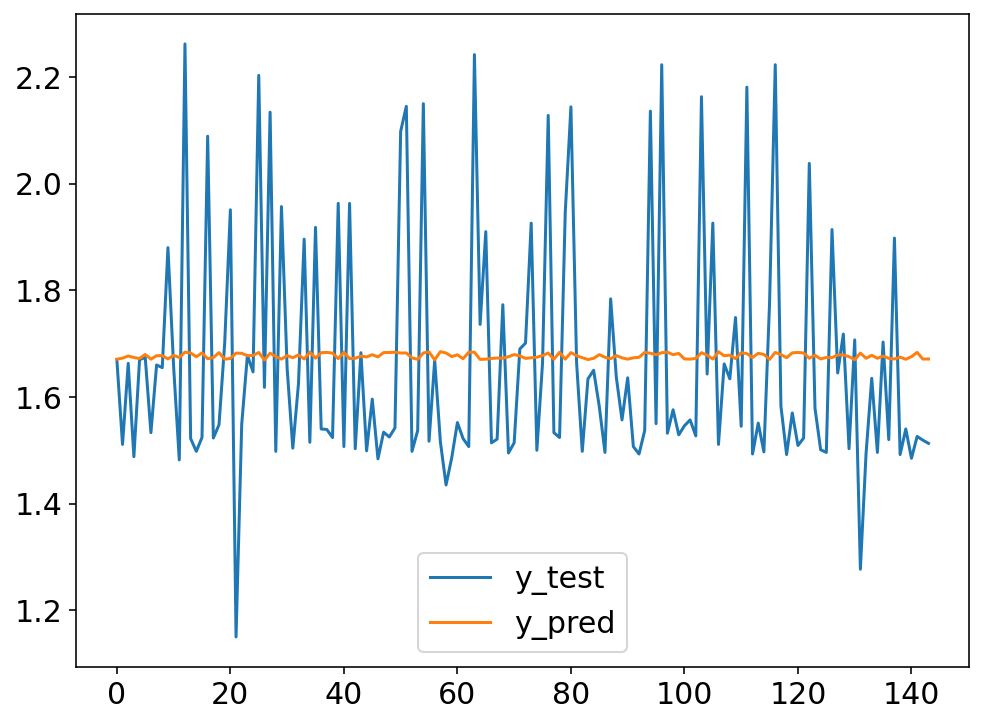

In [498]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [340]:
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, features)
    fig_size= 8
    if len(features) > 30: fig_size=12
    if len(features) > 40: fig_size=18
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(8,fig_size))
    plt.xlabel('Features Importance/Weights')
    plt.gca().legend_ = None

In [581]:
#SVM H Value
X = df[['Focus','Mag']]
y = df['H-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
svr = SVR(kernel="linear", gamma=10, C=100)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.375
Mean Absolute Error:  0.139
Root Mean Squared Error:  0.179
R-Squared:  0.011
Mean Absolute Percentile Error:  0.094
Percent Estimation:  90.641 %


In [462]:
cross_validation(svr,X,y)

0.3888

<AxesSubplot:>

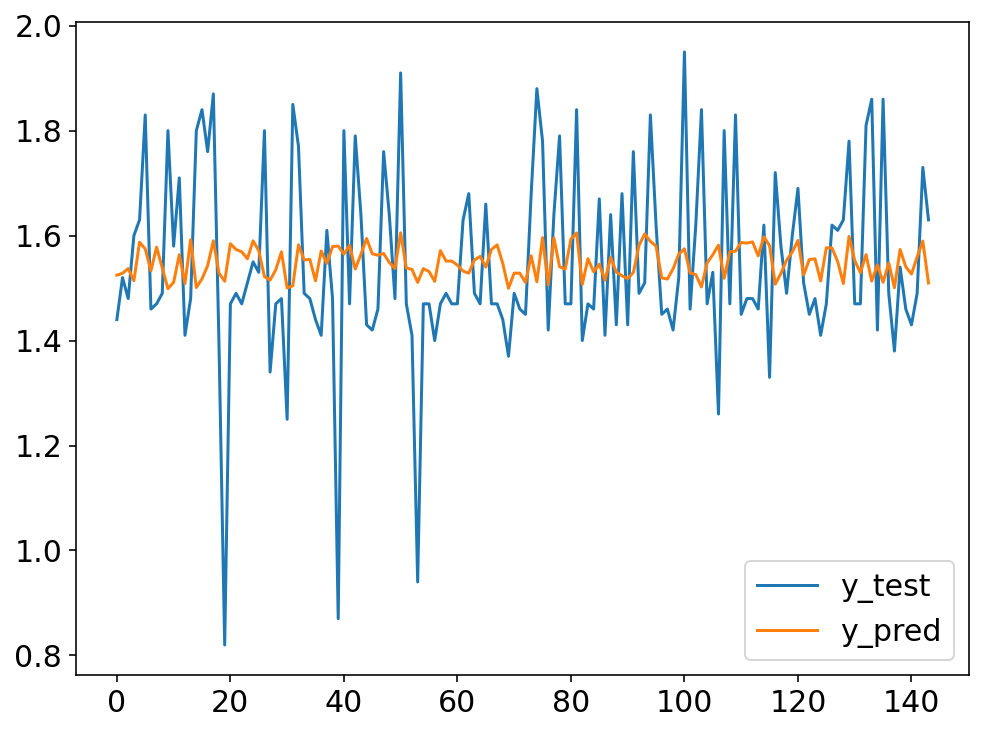

In [582]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [609]:
#SVM V Value
X = df[['Focus','Mag']]
y = df['V-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
svr = SVR(kernel="linear", gamma=10, C=100)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.641
Mean Absolute Error:  0.153
Root Mean Squared Error:  0.223
R-Squared:  -0.08
Mean Absolute Percentile Error:  0.084
Percent Estimation:  91.621 %


<AxesSubplot:>

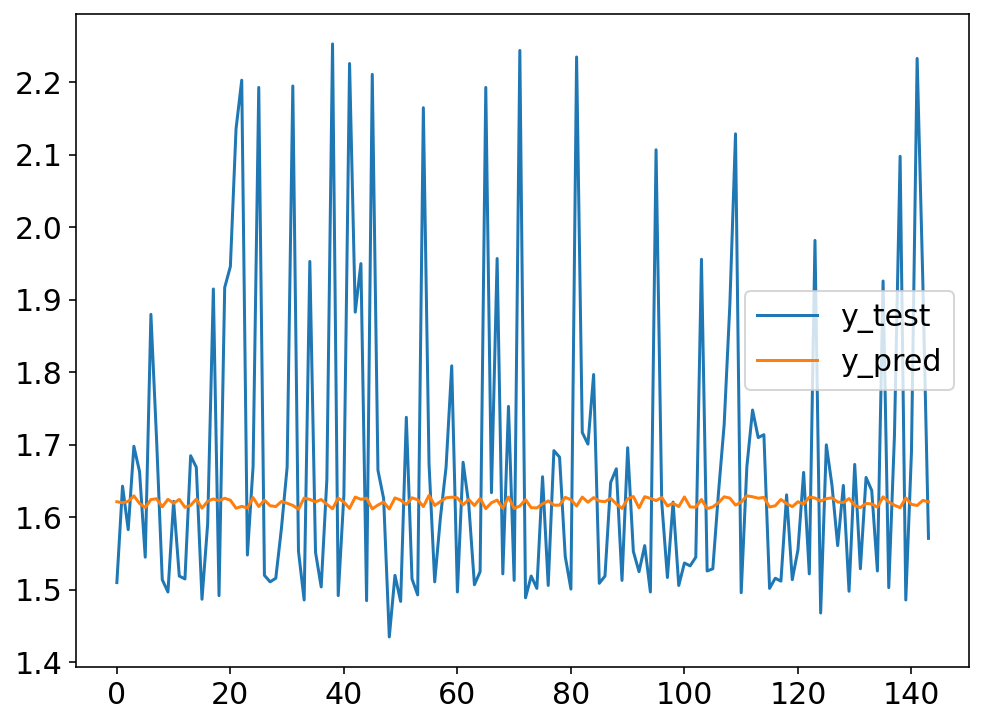

In [610]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [615]:
#Decision Tree H-Value
X = df[['Focus','Mag']]
y = df['H-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.76
Mean Absolute Error:  0.089
Root Mean Squared Error:  0.167
R-Squared:  0.227
Mean Absolute Percentile Error:  0.062
Percent Estimation:  93.77 %


In [470]:
cross_validation(dtr,X,y)

0.1827

<AxesSubplot:>

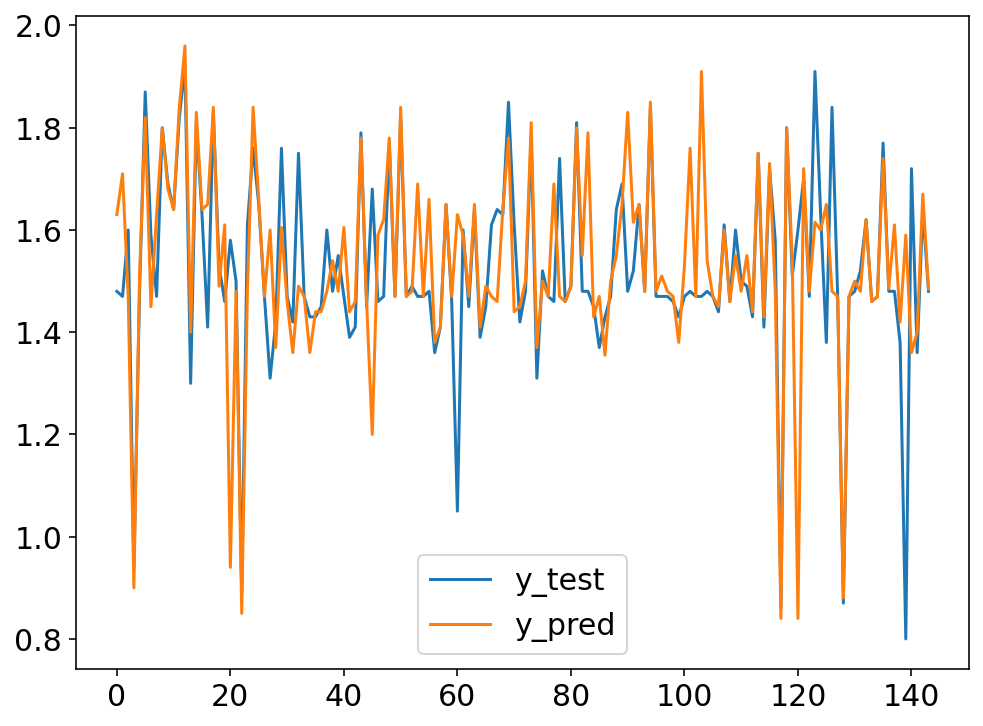

In [616]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

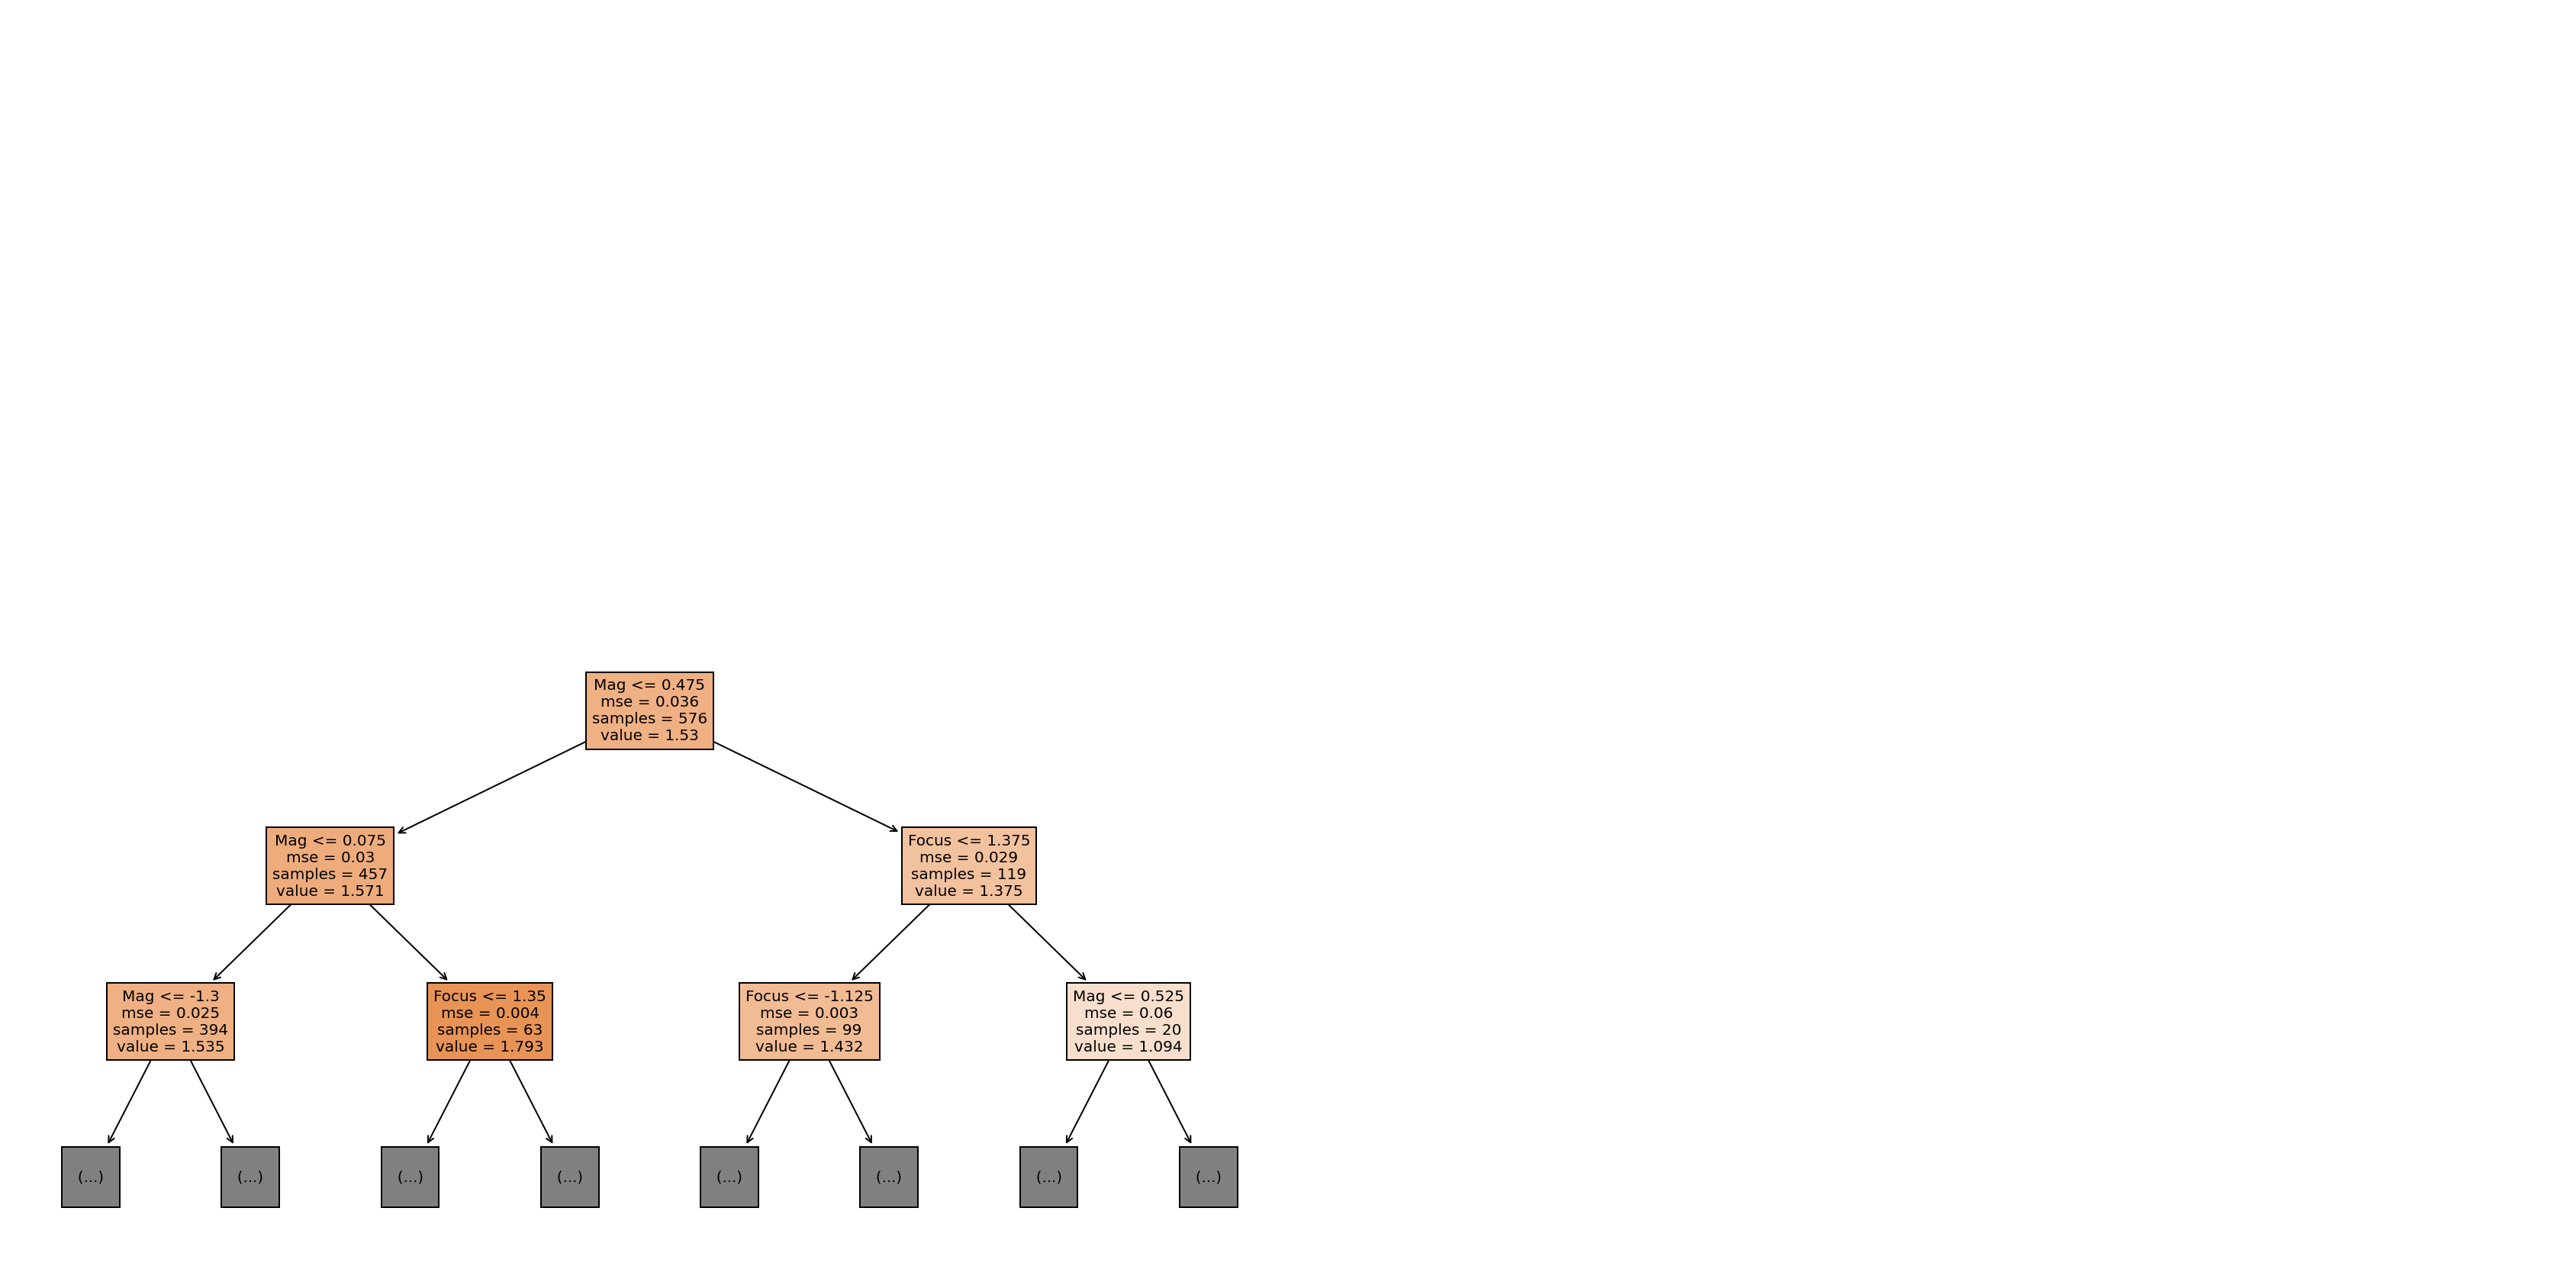

In [472]:
plt.figure(figsize=(30,15))
# plt.rcParams["figure.dpi"] = 200

tree.plot_tree(dtr, fontsize=10,
              feature_names=X.columns,
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

In [621]:
#Decision Tree V-Value
X = df[['Focus','Mag']]
y = df['V-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.567
Mean Absolute Error:  0.107
Root Mean Squared Error:  0.193
R-Squared:  0.24
Mean Absolute Percentile Error:  0.062
Percent Estimation:  93.844 %


<AxesSubplot:>

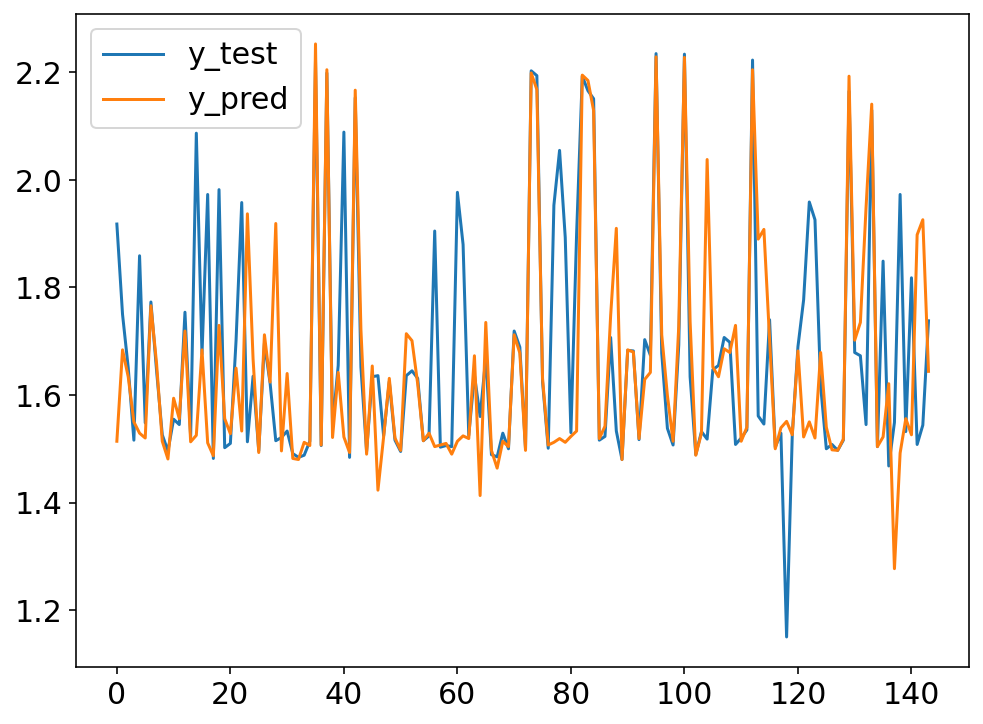

In [622]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [631]:
#랜덤포레스트 H-Value
X = df[['Focus','Mag']]
y = df['H-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.503
Mean Absolute Error:  0.07
Root Mean Squared Error:  0.14
R-Squared:  0.399
Mean Absolute Percentile Error:  0.053
Percent Estimation:  94.683 %


In [476]:
cross_validation(rfr,X,y)

0.3525

<AxesSubplot:>

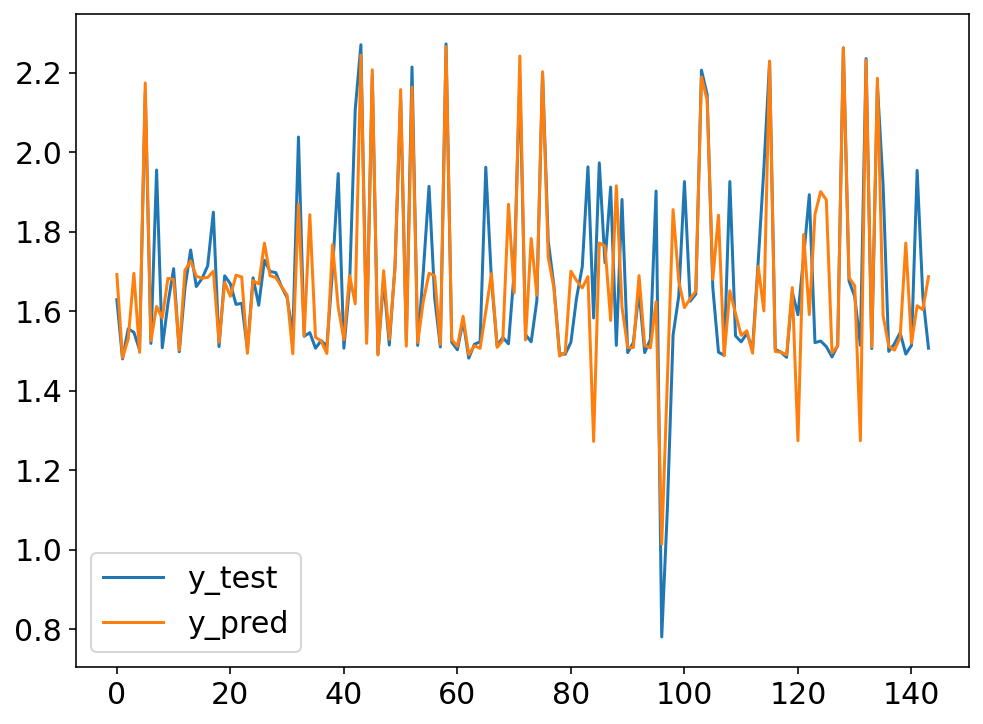

In [478]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [479]:
#랜덤포레스트 V-Value
X = df[['Focus','Mag']]
y = df['V-Value']
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.496
Mean Absolute Error:  0.09
Root Mean Squared Error:  0.156
R-Squared:  0.572
Mean Absolute Percentile Error:  0.054
Percent Estimation:  94.561 %


<AxesSubplot:>

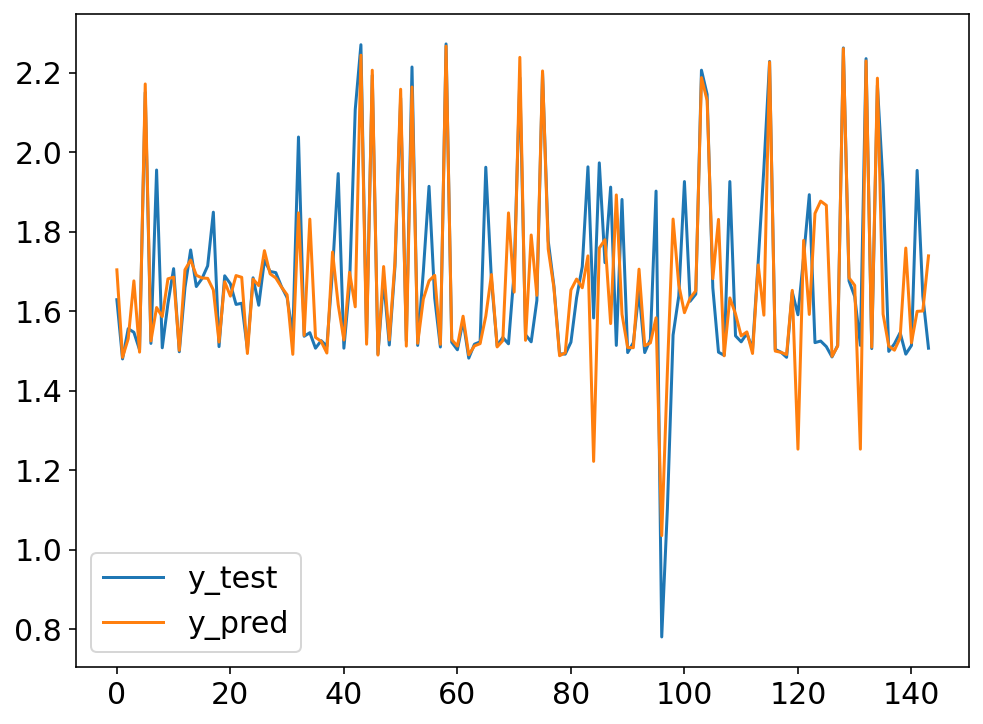

In [480]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [647]:
# LightBGM H-Value
X = df[['Focus','Mag']]
y = df['H-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.249
Mean Absolute Error:  0.067
Root Mean Squared Error:  0.107
R-Squared:  0.56
Mean Absolute Percentile Error:  0.046
Percent Estimation:  95.403 %


In [650]:
cross_validation(lgbm_r,X,y)

0.6257

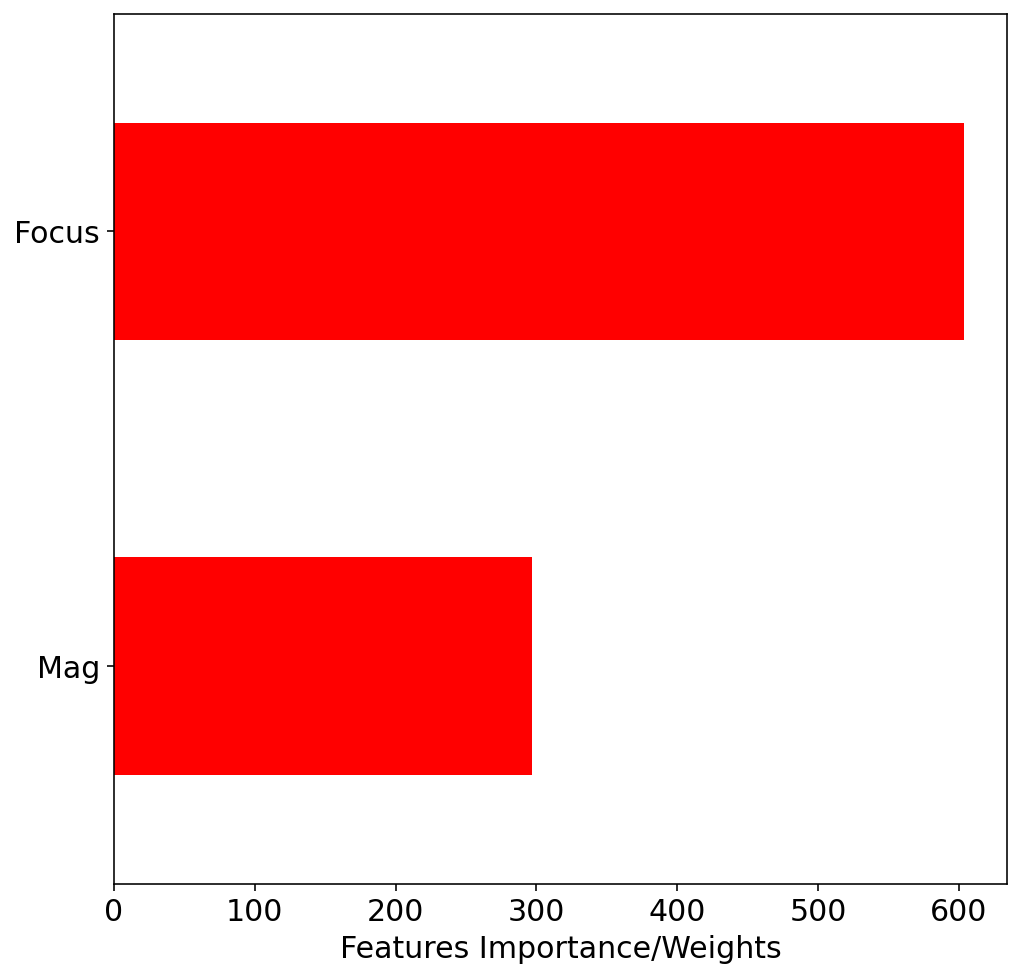

In [651]:
plot_features_weights(X.columns, lgbm_r.feature_importances_)

<AxesSubplot:>

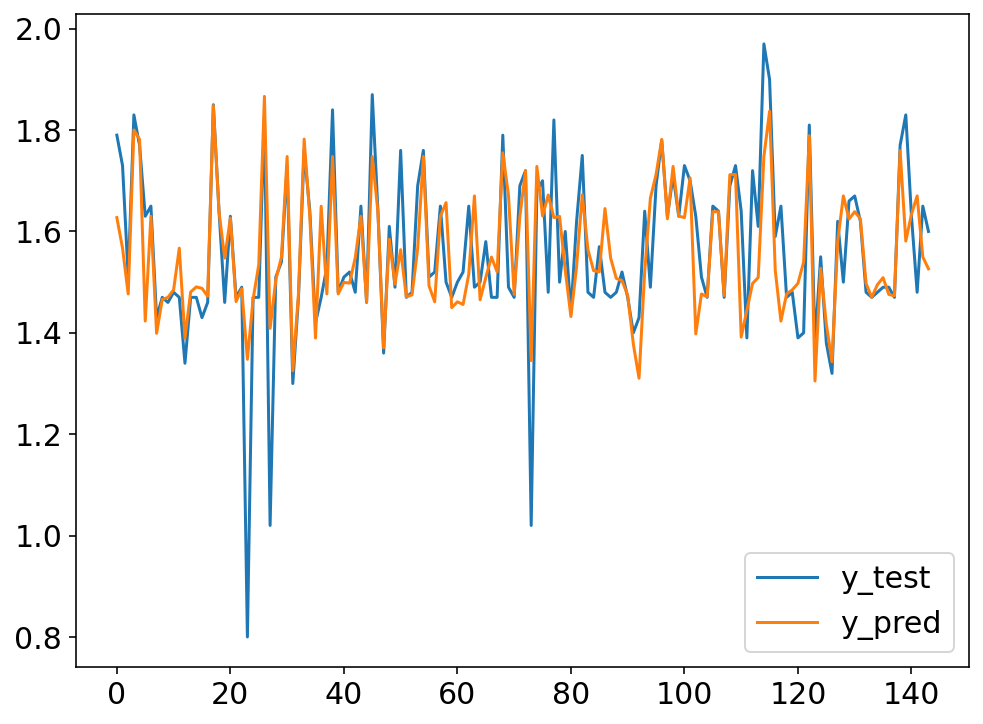

In [652]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [659]:
# LightBGM V-Value
X = df[['Focus','Mag']]
y = df['V-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.304
Mean Absolute Error:  0.073
Root Mean Squared Error:  0.115
R-Squared:  0.757
Mean Absolute Percentile Error:  0.044
Percent Estimation:  95.629 %


<AxesSubplot:>

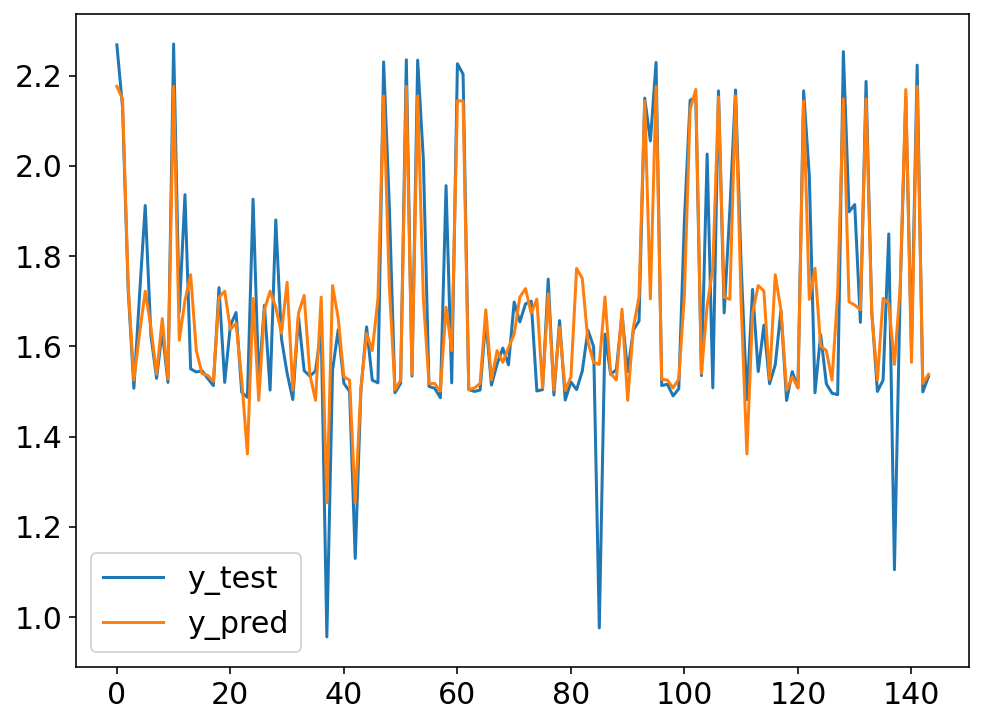

In [486]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [669]:
#랜덤포레스트 다변수 결과
X = df[['Focus','Mag']]
y = df[['H-Value','V-Value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

#각 열 추출해서 R Score값 비교
y_pred_H_Value = []
y_pred_V_Value = []
for row in y_pred:
    y_pred_H_Value.append(row[0])
    y_pred_V_Value.append(row[1])


print(f"H_Value RMS: {mean_squared_error(y_test['H-Value'], y_pred_H_Value, squared=False).round(3)}")
print(f"V_Value RMS: {mean_squared_error(y_test['V-Value'], y_pred_V_Value, squared=False).round(3)}")

print(f"H_Value R Score: {r2_score(y_test['H-Value'], y_pred_H_Value).round(3)}")
print(f"V_Value R Score: {r2_score(y_test['V-Value'], y_pred_V_Value).round(3)}")


H_Value RMS: 0.139
V_Value RMS: 0.173
H_Value R Score: 0.506
V_Value R Score: 0.511


<AxesSubplot:>

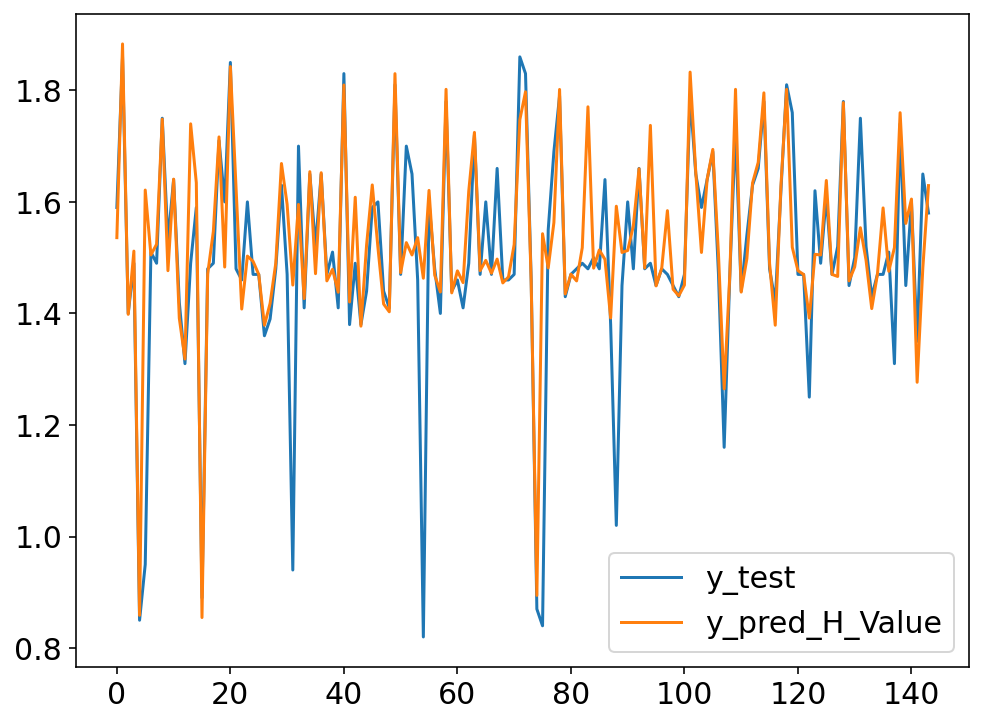

In [670]:
result = pd.DataFrame({'y_test':y_test['H-Value'], 'y_pred_H_Value':y_pred_H_Value})
result.reset_index(drop=True)[:].plot()

<AxesSubplot:>

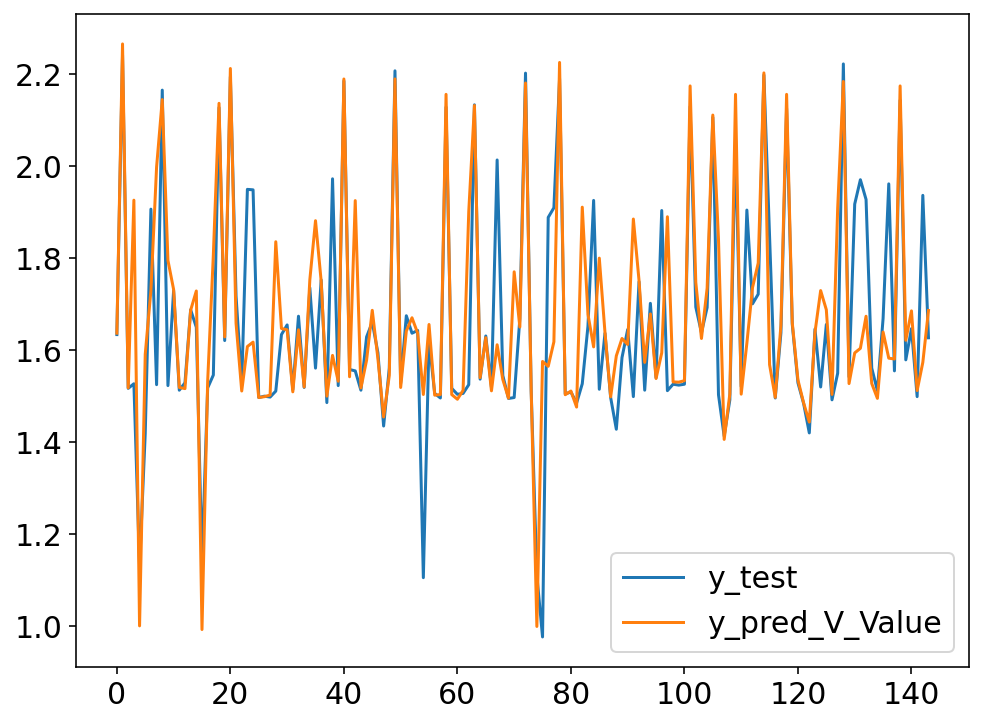

In [671]:
result = pd.DataFrame({'y_test':y_test['V-Value'], 'y_pred_V_Value':y_pred_V_Value})
result.reset_index(drop=True)[:].plot()

In [674]:
#랜덤포레스트 튜닝 (다변수)
X = df[['Focus','Mag']]
y = df[['H-Value','V-Value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rfr = RandomForestRegressor()
grid_cv = GridSearchCV(rfr, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print(f"Best Param: {grid_cv.best_params_}")



Best Param: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
H_Value RMS: 0.101
V_Value RMS: 0.116
H_Value R Score: 0.702
V_Value R Score: 0.784


In [683]:
#각 열 추출해서 R Score값 비교
rfr = RandomForestRegressor(n_estimators= 100, max_depth=6, min_samples_leaf=8, min_samples_split=8)
rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)

y_pred_H_Value = []
y_pred_V_Value = []
for row in y_pred:
    y_pred_H_Value.append(row[0])
    y_pred_V_Value.append(row[1])

print(f"H_Value RMS: {mean_squared_error(y_test['H-Value'], y_pred_H_Value, squared=False).round(3)}")
print(f"V_Value RMS: {mean_squared_error(y_test['V-Value'], y_pred_V_Value, squared=False).round(3)}")

print(f"H_Value R Score: {r2_score(y_test['H-Value'], y_pred_H_Value).round(3)}")
print(f"V_Value R Score: {r2_score(y_test['V-Value'], y_pred_V_Value).round(3)}")

H_Value RMS: 0.102
V_Value RMS: 0.116
H_Value R Score: 0.7
V_Value R Score: 0.784


<AxesSubplot:>

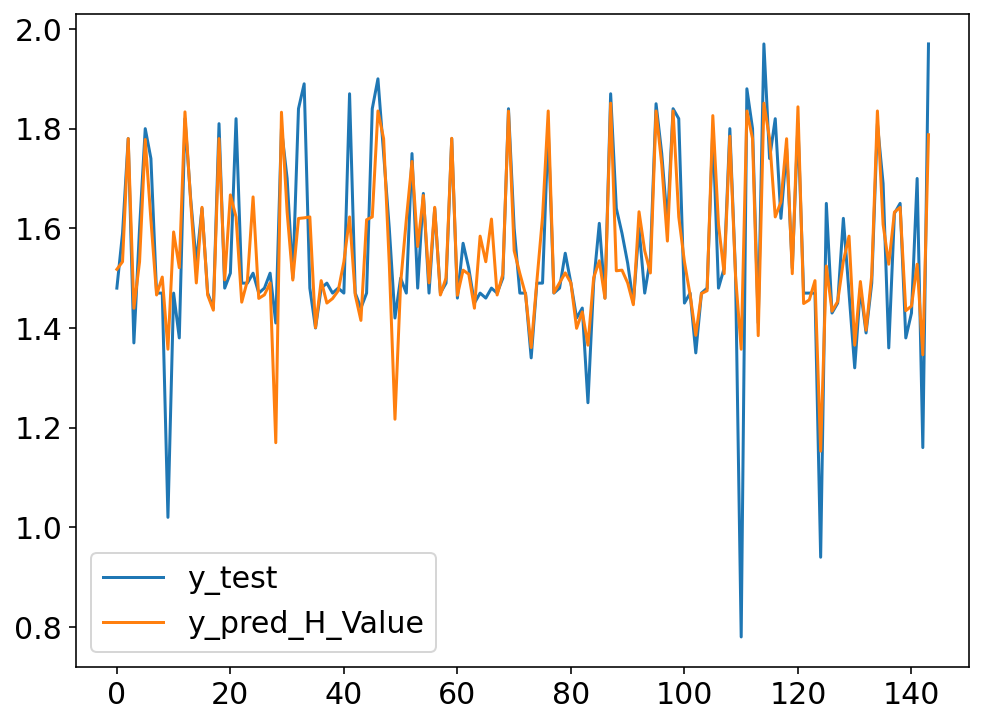

In [684]:
result = pd.DataFrame({'y_test':y_test['H-Value'], 'y_pred_H_Value':y_pred_H_Value})
result.reset_index(drop=True)[:].plot()

<AxesSubplot:>

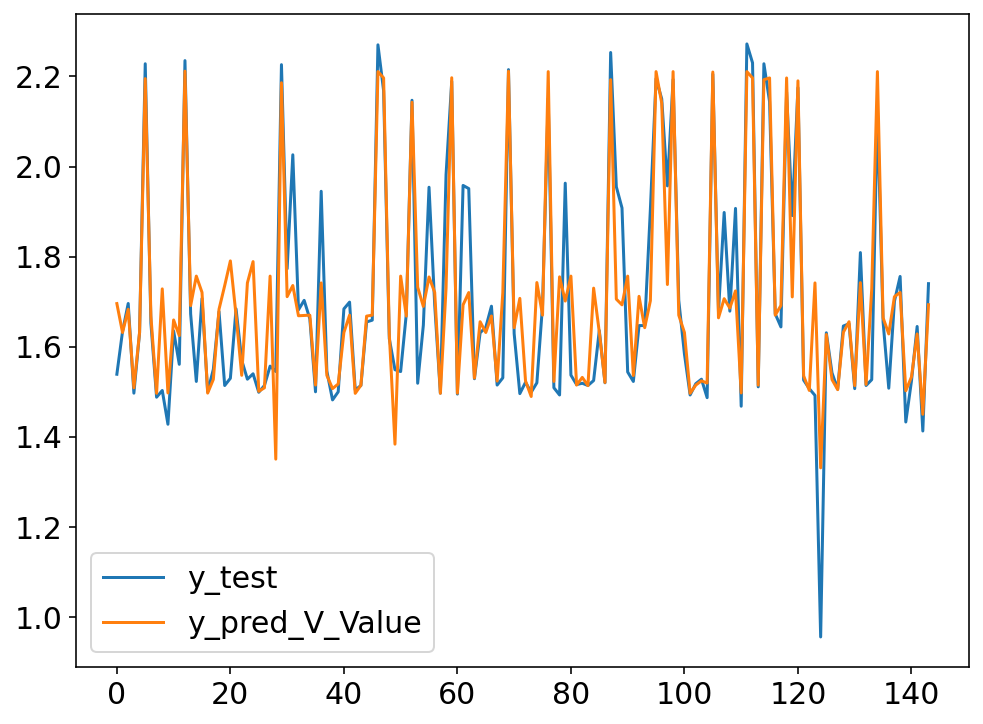

In [685]:
result = pd.DataFrame({'y_test':y_test['V-Value'], 'y_pred_V_Value':y_pred_V_Value})
result.reset_index(drop=True)[:].plot()

In [542]:
#랜덤포레스트 튜닝 (다변수)  --- 아웃라이어 제거 후 
df2 = df[(df["H-Value"] < 1.8) & (df["H-Value"] > 1.1) & (df["V-Value"] < 1.8) & (df["V-Value"] > 1.1)]
print(len(df2))
X = df2[['Focus','Mag']]
y = df2[['H-Value','V-Value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

params ={
    'n_estimators':[100, 200],
    'max_depth':[6,8,10,12,15],
    'min_samples_leaf':[8,12,18, 22],
    'min_samples_split':[8,16,20, 24]
}

rfr = RandomForestRegressor()
grid_cv = GridSearchCV(rfr, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)
y_pred = grid_cv.predict(X_test)


#각 열 추출해서 R Score값 비교
y_pred_H_Value = []
y_pred_V_Value = []
for row in y_pred:
    y_pred_H_Value.append(row[0])
    y_pred_V_Value.append(row[1])

print(f"H_Value R Score: {r2_score(y_test['H-Value'], y_pred_H_Value).round(3)}")
print(f"V_Value R Score: {r2_score(y_test['V-Value'], y_pred_V_Value).round(3)}")

513
H_Value R Score: 0.565
V_Value R Score: 0.895


<AxesSubplot:>

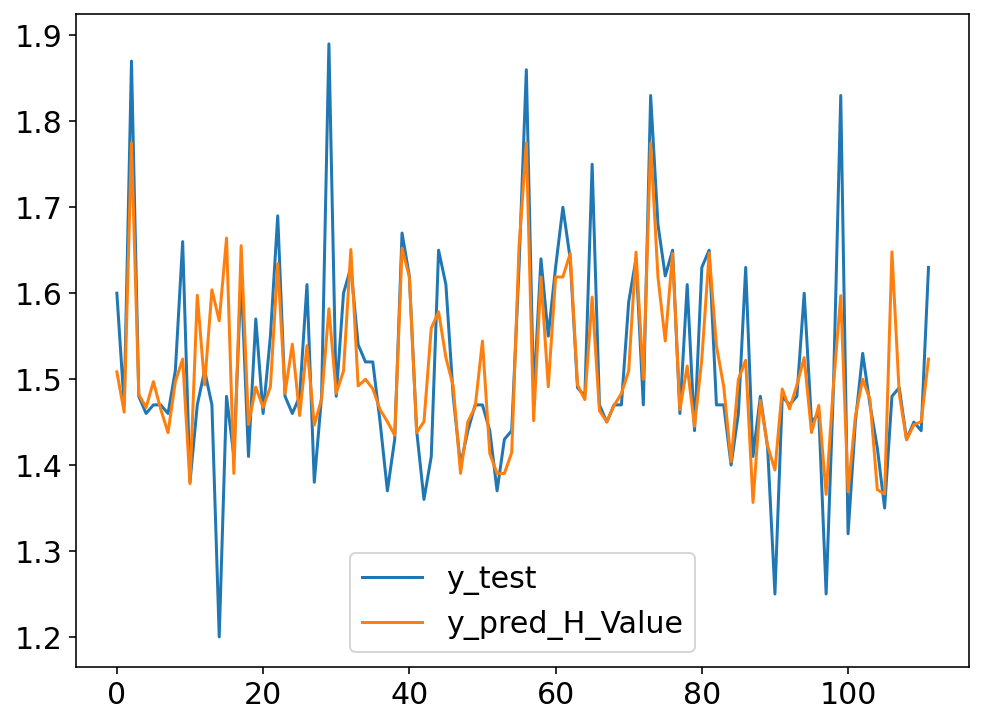

In [540]:
result = pd.DataFrame({'y_test':y_test['H-Value'], 'y_pred_H_Value':y_pred_H_Value})
result.reset_index(drop=True)[:].plot()

<AxesSubplot:>

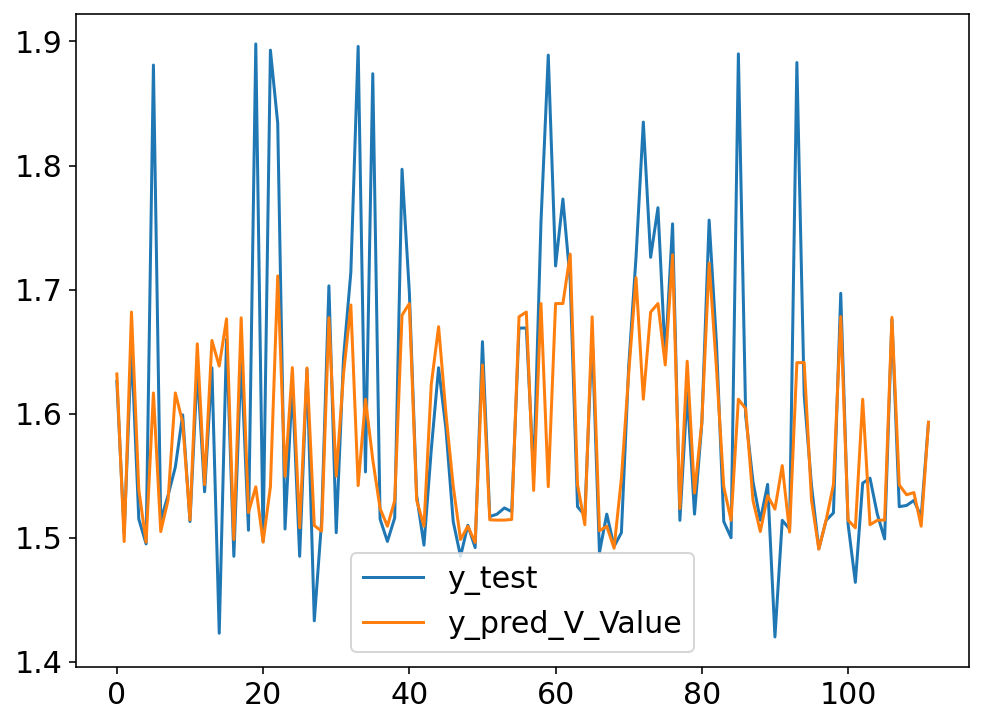

In [541]:
result = pd.DataFrame({'y_test':y_test['V-Value'], 'y_pred_V_Value':y_pred_V_Value})
result.reset_index(drop=True)[:].plot()